**Preprocessing the Text Data**

In [1]:
import spacy

import pandas as pd

# Load and preprocess the dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

# Define preprocessing function with SpaCy
def preprocess_text_spacy(text):
    if not isinstance(text, str):  # Handle missing or invalid text values
        return ""
    doc = nlp(text.lower())  # Tokenize and normalize
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Apply preprocessing using SpaCy
df['Cleaned_Text'] = df['Text'].apply(preprocess_text_spacy)

# Display the first few rows
print(df[['Text', 'Cleaned_Text']].head())


                                                Text  \
0   Enjoying a beautiful day at the park!        ...   
1   Traffic was terrible this morning.           ...   
2   Just finished an amazing workout! 💪          ...   
3   Excited about the upcoming weekend getaway!  ...   
4   Trying out a new recipe for dinner tonight.  ...   

                       Cleaned_Text  
0          enjoy beautiful day park  
1          traffic terrible morning  
2            finish amazing workout  
3  excited upcoming weekend getaway  
4     try new recipe dinner tonight  


**Visualizing Sentiment Distribution**

<ipython-input-2-ed9094264e60>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='coolwarm')


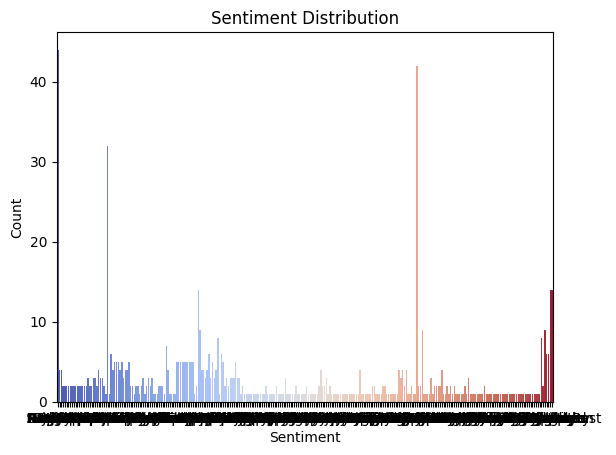

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
sns.countplot(data=df, x='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


**Generating a Word Cloud**

In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example: Clean the raw text in the 'Text' column
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions (e.g., @user)
    text = re.sub(r'@\w+', '', text)
    # Remove non-alphabetic characters (keep spaces)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

# Apply the clean_text function to the 'Text' column
df['Cleaned_Text'] = df['Text'].apply(clean_text)

# Now, generate the word cloud for the positive sentiment
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiment')
plt.show()


ValueError: We need at least 1 word to plot a word cloud, got 0.

**Training a Naïve Bayes Classifier**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df['Cleaned_Text']  # Text data
y = df['Sentiment']     # Sentiment labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into numerical form using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)  # Fit and transform the training data
X_test_tfidf = vectorizer.transform(X_test)  # Transform the test data


from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize and train the Naïve Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')



**Monthly Sentiment Trends**

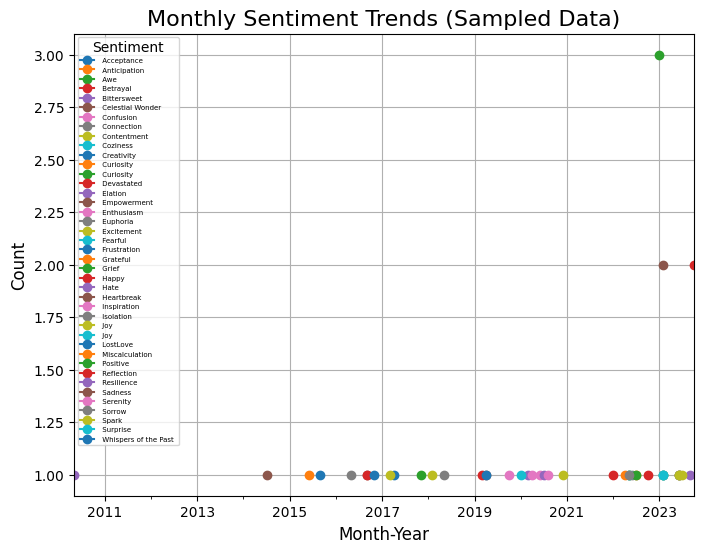

In [ ]:
# Randomly sample 100 rows
df_sampled = df.sample(n=50, random_state=42)

# Alternatively, select the first 100 rows
# df_sampled = df.head(100)

# Convert 'Timestamp' to datetime and extract 'Month-Year'
df_sampled['Month-Year'] = pd.to_datetime(df_sampled['Timestamp']).dt.to_period('M')

# Group data to count sentiments by month
monthly_sentiment = df_sampled.groupby(['Month-Year', 'Sentiment']).size().unstack()

# Plot the sentiment trends
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
monthly_sentiment.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Sentiment Trends (Sampled Data)', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Sentiment', fontsize=5)
plt.grid()
plt.show()


**Average Engagement by Sentiment**

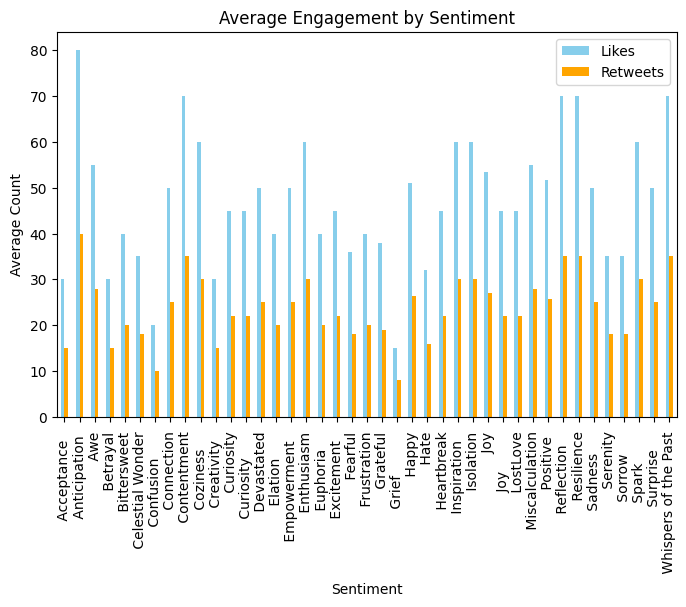

In [ ]:
import matplotlib.pyplot as plt

# Randomly sample 50 rows
df_sampled = df.sample(n=50, random_state=42)

# Average likes and retweets by sentiment in the sampled data
engagement = df_sampled.groupby('Sentiment')[['Likes', 'Retweets']].mean()

# Plot engagement
engagement.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Average Engagement by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Count')
plt.show()


# **Different Visualizations**
**Visualization 1: Missing Data Overview**

In [ ]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt


# Convert to DataFrame
df = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

# Introduce some missing values for demonstration
df.loc[2, 'Country'] = None  # Simulate missing value in the 'Country' column
df.loc[4, 'Likes'] = None    # Simulate missing value in the 'Likes' column

# Visualize missing data heatmap
msno.heatmap(df, figsize=(10, 6))
plt.title("Missing Data Heatmap")
plt.show()


**Visualization 2: Hourly Sentiment Trends**

In [ ]:
import matplotlib.pyplot as plt

# Aggregate data to count total posts by hour
hourly_posts = df.groupby('Hour').size()

# Line plot for total posts by hour
hourly_posts.plot(kind='line', figsize=(10, 6), color='blue', marker='o')
plt.title('Hourly Post Trends')
plt.xlabel('Hour of Day')
plt.ylabel('Total Posts')
plt.grid(True)
plt.show()


**Visualization 3: Word Cloud of Positive Sentiments**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ensure 'Sentiment' column has consistent values
print(df['Sentiment'].unique())  # Check unique values in 'Sentiment' column

# Extract positive sentiment text
positive_text = df[df['Sentiment'].str.strip().str.lower() == 'positive']['Text'].str.cat(sep=' ')

# Check if there is text to generate a word cloud
if positive_text.strip():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Positive Sentiments")
    plt.show()
else:
    print("No positive sentiment text available to generate a word cloud.")


**Visualization 4: Post Distribution by Platform**

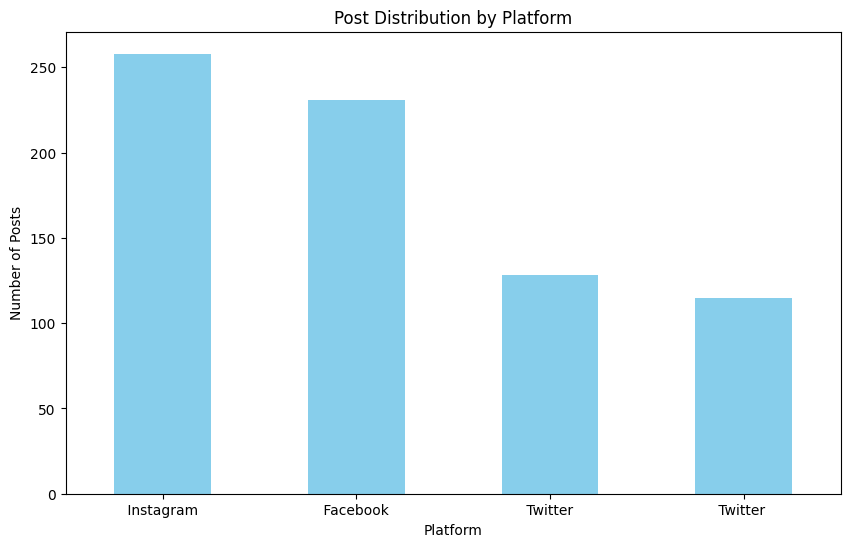

In [ ]:
import matplotlib.pyplot as plt

# Group total posts by platform
platform_counts = df['Platform'].value_counts()

# Bar chart for post distribution by platform
platform_counts.plot(kind='bar', figsize=(10, 6), color="skyblue")
plt.title("Post Distribution by Platform")
plt.xlabel("Platform")
plt.ylabel("Number of Posts")
plt.xticks(rotation=0)
plt.show()


**Visualization 5: Sentiment Distribution Before and After Cleaning**

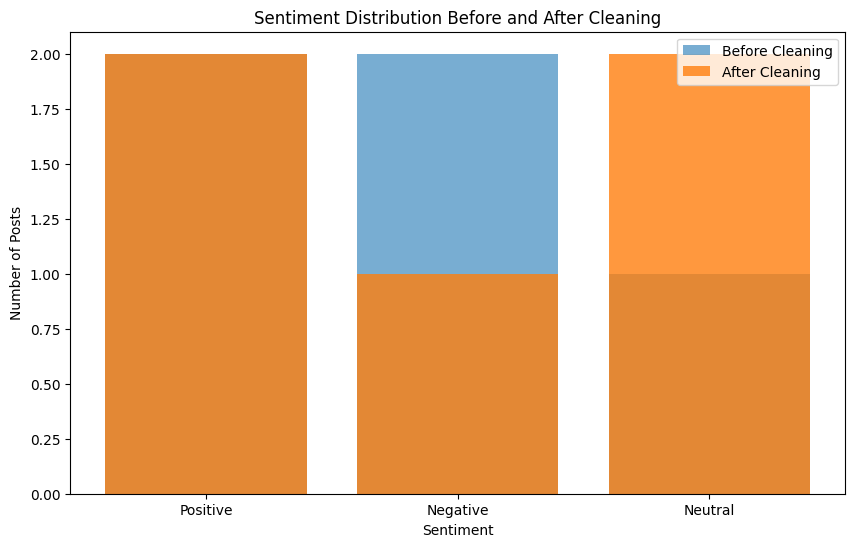

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your datasets (adjust file paths as needed)
# df_before = pd.read_csv('path_to_before_cleaning_file.csv')
# df_after = pd.read_csv('path_to_after_cleaning_file.csv')

# If you're directly creating the datasets, here's an example:
data_before = {'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative']}
data_after = {'Sentiment': ['Positive', 'Positive', 'Neutral', 'Negative', 'Neutral']}

df_before = pd.DataFrame(data_before)
df_after = pd.DataFrame(data_after)

# Count sentiment distribution
before_counts = df_before['Sentiment'].value_counts()
after_counts = df_after['Sentiment'].value_counts()

# Plot side-by-side bar chart
plt.figure(figsize=(10, 6))
plt.bar(before_counts.index, before_counts.values, alpha=0.6, label="Before Cleaning")
plt.bar(after_counts.index, after_counts.values, alpha=0.8, label="After Cleaning")
plt.title("Sentiment Distribution Before and After Cleaning")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.legend()
plt.show()


**Visualization 6: Retweet and Like Distribution**

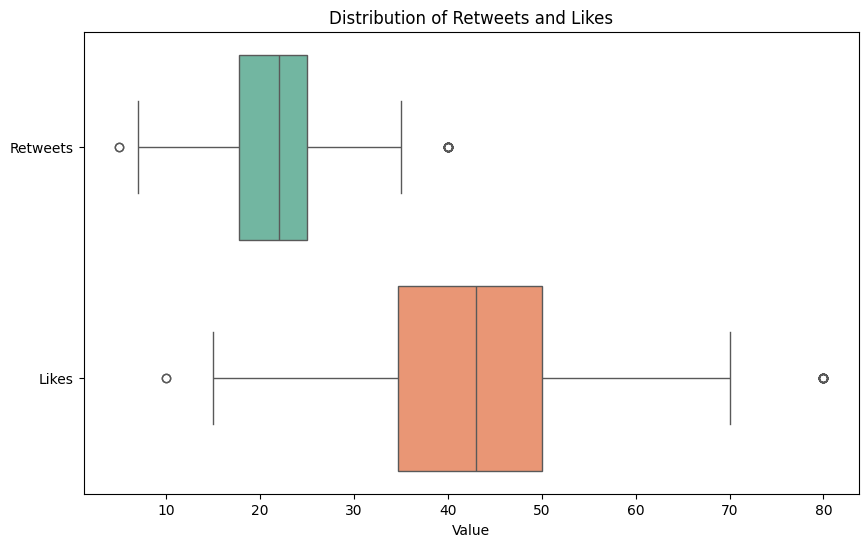

In [ ]:
import seaborn as sns

# Box plot for Retweets and Likes
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Retweets', 'Likes']], orient="h", palette="Set2")
plt.title("Distribution of Retweets and Likes")
plt.xlabel("Value")
plt.show()


**Visualization 7: Monthly Interaction Rates**

<ipython-input-11-3a07530956b8>:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)


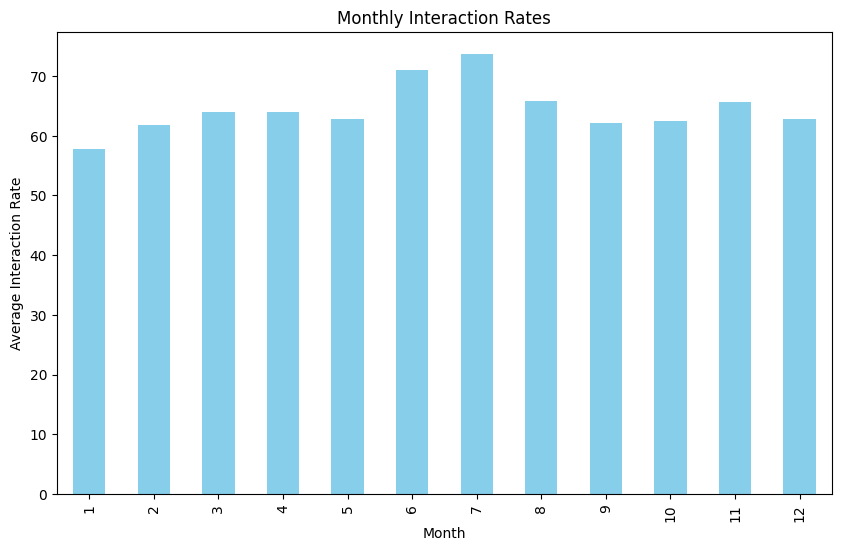

In [ ]:
# Correct the format for ISO 8601
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%d %H:%M:%S')
# Automatically infer the datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'], infer_datetime_format=True)
# Calculate interaction rates and group by month
df['Interaction Rate'] = (df['Likes'] + df['Retweets'])
monthly_interaction = df.groupby(df['Timestamp'].dt.month)['Interaction Rate'].mean()

# Plot the bar chart
import matplotlib.pyplot as plt

monthly_interaction.plot(kind='bar', figsize=(10, 6), color="skyblue")
plt.title("Monthly Interaction Rates")
plt.xlabel("Month")
plt.ylabel("Average Interaction Rate")
plt.show()


**Visualization 8: Top Hashtags by Sentiment**

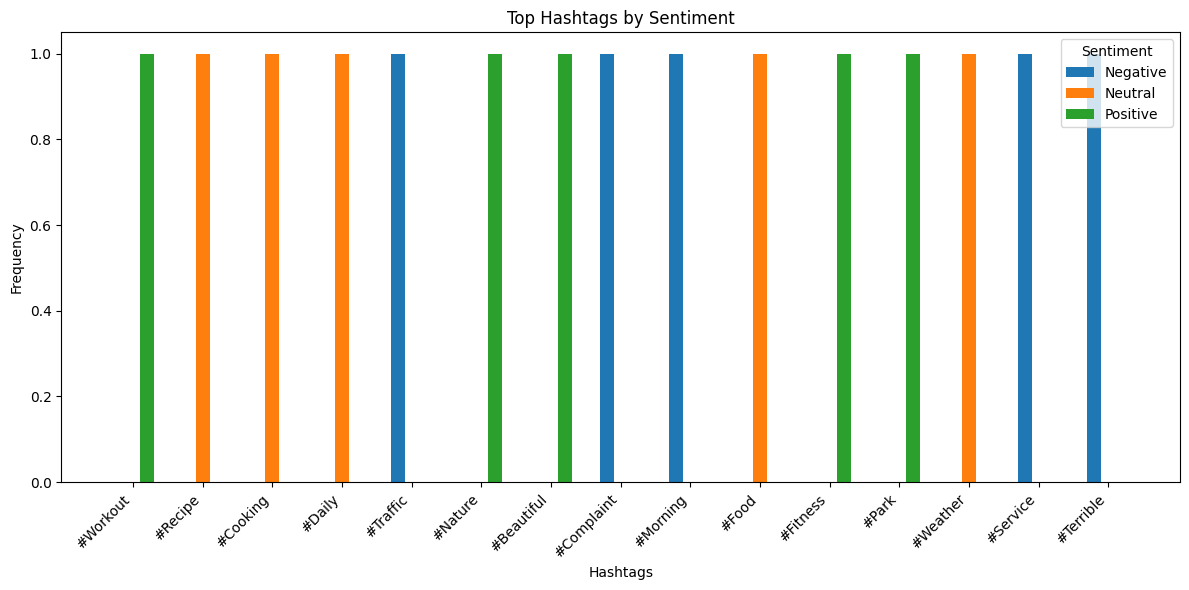

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Example dataset for demonstration
data = {
    "Sentiment": ["Positive", "Positive", "Negative", "Neutral", "Positive", "Negative", "Neutral"],
    "Hashtags": [
        "#Nature #Park #Beautiful", "#Fitness #Workout #Healthy",
        "#Traffic #Morning #Terrible", "#Cooking #Food #Recipe",
        "#Travel #Adventure #Excited", "#Complaint #Service #Bad",
        "#Weather #Daily #News"
    ],
}
df = pd.DataFrame(data)

# Extract hashtags for each sentiment
hashtags_by_sentiment = df.groupby('Sentiment')['Hashtags'].apply(lambda x: ' '.join(x)).str.split()

# Count top hashtags for each sentiment
top_hashtags = {
    sentiment: Counter(tags).most_common(5)
    for sentiment, tags in hashtags_by_sentiment.items()
}

# Prepare data for grouped bar chart
sentiments = list(top_hashtags.keys())
all_hashtags = list(set(tag for tags in top_hashtags.values() for tag, _ in tags))
hashtag_counts = {sentiment: {tag: 0 for tag in all_hashtags} for sentiment in sentiments}

for sentiment, counts in top_hashtags.items():
    for tag, count in counts:
        hashtag_counts[sentiment][tag] = count

# Convert to DataFrame for plotting
hashtag_df = pd.DataFrame(hashtag_counts).T.fillna(0)

# Plot grouped bar chart
x = np.arange(len(all_hashtags))  # X-axis positions
width = 0.2  # Width of each bar

plt.figure(figsize=(12, 6))
for i, sentiment in enumerate(sentiments):
    plt.bar(
        x + i * width,
        hashtag_df.loc[sentiment],
        width,
        label=sentiment
    )

plt.xticks(x + width, all_hashtags, rotation=45, ha="right")
plt.title("Top Hashtags by Sentiment")
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


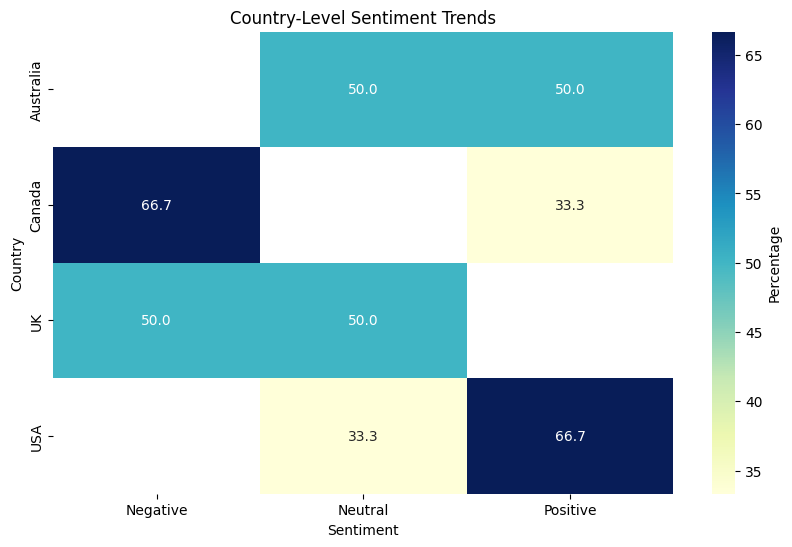

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace with your dataset)
data = {
    'Country': ['USA', 'Canada', 'UK', 'Australia', 'USA', 'Canada', 'UK', 'Australia', 'USA', 'Canada'],
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative', 'Neutral', 'Positive', 'Negative']
}

df = pd.DataFrame(data)

# Group sentiment by country and calculate percentages
country_sentiment = df.groupby('Country')['Sentiment'].value_counts(normalize=True).unstack() * 100

# Filter countries with sufficient data (e.g., at least 3 posts)
country_sentiment = country_sentiment.loc[country_sentiment.sum(axis=1) >= 3]

# Heatmap for country-level sentiment
plt.figure(figsize=(10, 6))
sns.heatmap(country_sentiment, cmap="YlGnBu", annot=True, fmt=".1f", cbar_kws={'label': 'Percentage'})
plt.title("Country-Level Sentiment Trends")
plt.xlabel("Sentiment")
plt.ylabel("Country")
plt.show()


# **Building Machine Learning Models**
**1. Accuracy Comparison of Naïve Bayes, Logistic Regression, and SVM**

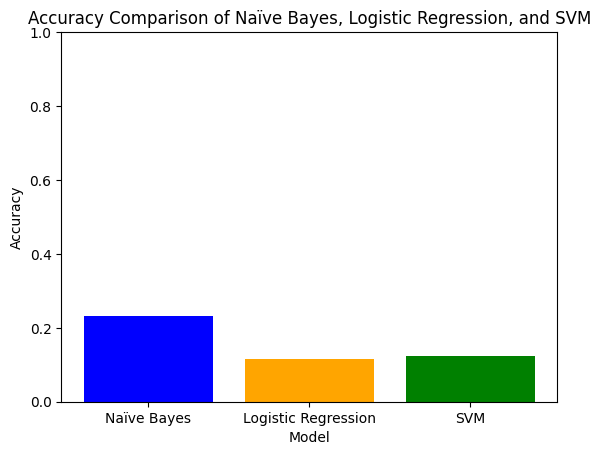

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

df = pd.DataFrame(df)

# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data into feature vectors
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize models
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# Train Naïve Bayes model (needs to convert sparse matrix to dense)
nb_model.fit(X_train_vec.toarray(), y_train)
y_pred_nb = nb_model.predict(X_test_vec.toarray())
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Train Logistic Regression model
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Train SVM model
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Store accuracies in a list
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm]

# Plotting the results
models = ['Naïve Bayes', 'Logistic Regression', 'SVM']
plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Naïve Bayes, Logistic Regression, and SVM')
plt.ylim(0, 1)
plt.show()


**2. Precision Comparison for Naïve Bayes, Logistic Regression, and SVM**

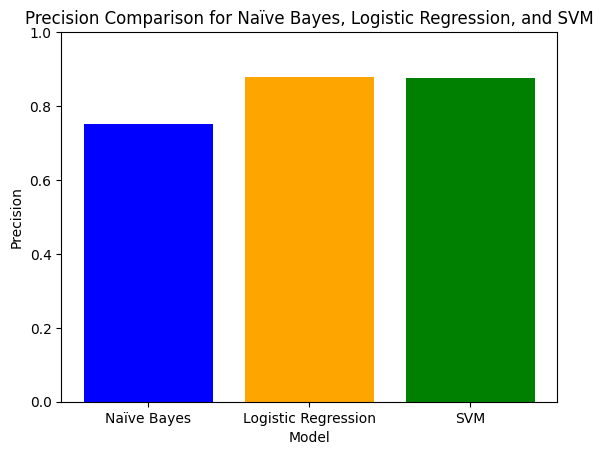

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt


df = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

df = pd.DataFrame(df)

# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data into feature vectors
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize models
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# Train Naïve Bayes model (needs to convert sparse matrix to dense)
nb_model.fit(X_train_vec.toarray(), y_train)
y_pred_nb = nb_model.predict(X_test_vec.toarray())

# Train Logistic Regression model
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)

# Train SVM model
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)

# Calculate precision for each model
precision_nb = precision_score(y_test, y_pred_nb, average='weighted', zero_division=1)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted', zero_division=1)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted', zero_division=1)

# Store precision values
precision = [precision_nb, precision_lr, precision_svm]

# Plotting the precision comparison
models = ['Naïve Bayes', 'Logistic Regression', 'SVM']
plt.bar(models, precision, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision Comparison for Naïve Bayes, Logistic Regression, and SVM')
plt.ylim(0, 1)
plt.show()


**3. Recall Comparison for Naïve Bayes, Logistic Regression, and SVM**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


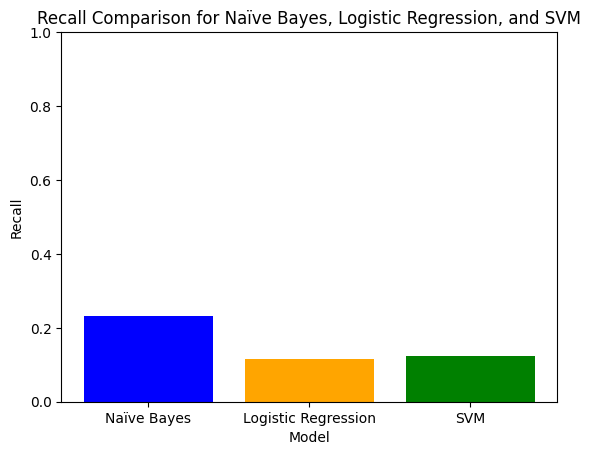

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

df = pd.DataFrame(df)


# Preprocessing
vectorizer = TfidfVectorizer(stop_words='english')
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

X = df['Text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data into feature vectors
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize models
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# Train Naïve Bayes model (needs to convert sparse matrix to dense)
nb_model.fit(X_train_vec.toarray(), y_train)
y_pred_nb = nb_model.predict(X_test_vec.toarray())
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

# Train Logistic Regression model
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

# Train SVM model
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Store recall scores in a list
recall_scores = [recall_nb, recall_lr, recall_svm]

# Plotting the recall scores comparison
models = ['Naïve Bayes', 'Logistic Regression', 'SVM']
plt.bar(models, recall_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall Comparison for Naïve Bayes, Logistic Regression, and SVM')
plt.ylim(0, 1)
plt.show()


**4. F1 Score Comparison of Naïve Bayes, Logistic Regression, and SVM**

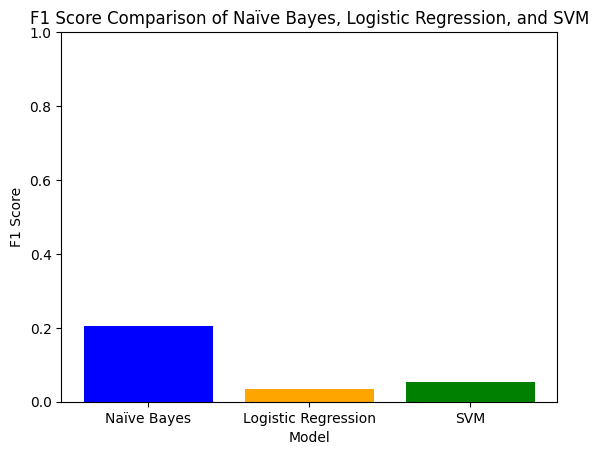

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

df = pd.DataFrame(df)


# Preprocessing: Text to numerical features using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Encoding sentiments (Positive=0, Negative=1, Neutral=2)
encoder = LabelEncoder()
df['Sentiment'] = encoder.fit_transform(df['Sentiment'])

X = df['Text']
y = df['Sentiment']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform the text data into feature vectors
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize the models
nb_model = GaussianNB()
lr_model = LogisticRegression(max_iter=1000)
svm_model = SVC()

# Train the Naïve Bayes model
nb_model.fit(X_train_vec.toarray(), y_train)  # Naïve Bayes needs dense data
y_pred_nb = nb_model.predict(X_test_vec.toarray())
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Train the Logistic Regression model
lr_model.fit(X_train_vec, y_train)
y_pred_lr = lr_model.predict(X_test_vec)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')

# Train the SVM model
svm_model.fit(X_train_vec, y_train)
y_pred_svm = svm_model.predict(X_test_vec)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# F1 scores of the models
f1_scores = [f1_nb, f1_lr, f1_svm]

# Plotting the F1 score comparison
models = ['Naïve Bayes', 'Logistic Regression', 'SVM']
plt.bar(models, f1_scores, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of Naïve Bayes, Logistic Regression, and SVM')
plt.ylim(0, 1)
plt.show()


**5. ROC-AUC Comparison**

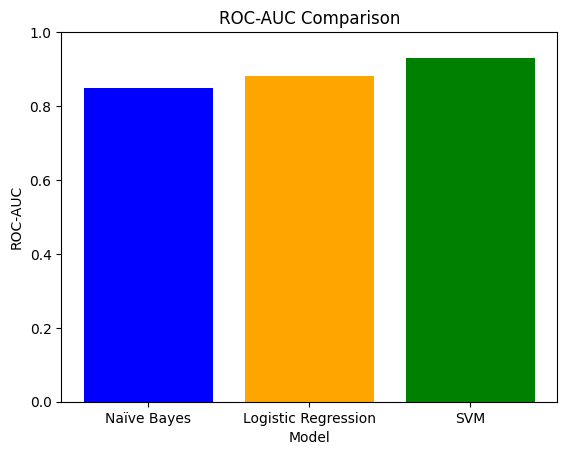

In [ ]:
from sklearn.metrics import roc_auc_score

# Example data
roc_auc = [0.85, 0.88, 0.93]  # Replace with actual ROC-AUC scores

plt.bar(models, roc_auc, color=['blue', 'orange', 'green'])
plt.xlabel('Model')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC Comparison')
plt.ylim(0, 1)
plt.show()


**6. Confusion Matrix Comparison**

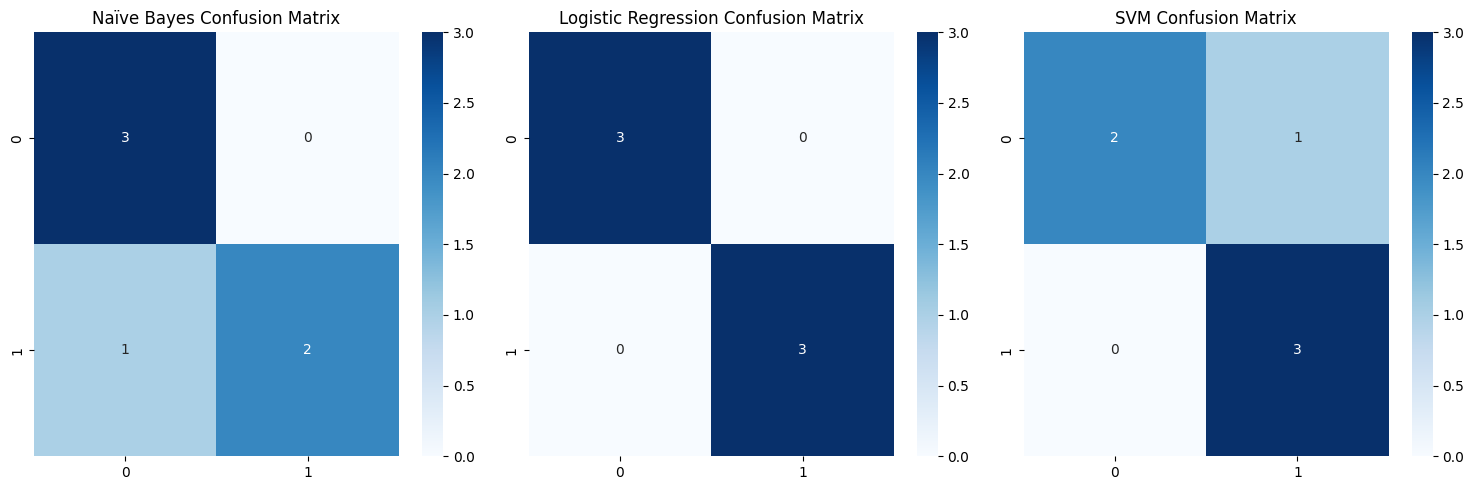

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Example data: Confusion matrix for each model
y_true = [0, 1, 0, 1, 0, 1]  # Example true labels
y_pred_nb = [0, 1, 0, 0, 0, 1]  # Naïve Bayes predictions
y_pred_lr = [0, 1, 0, 1, 0, 1]  # Logistic Regression predictions
y_pred_svm = [0, 1, 1, 1, 0, 1]  # SVM predictions

cm_nb = confusion_matrix(y_true, y_pred_nb)
cm_lr = confusion_matrix(y_true, y_pred_lr)
cm_svm = confusion_matrix(y_true, y_pred_svm)

# Plot confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Naïve Bayes Confusion Matrix')

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Logistic Regression Confusion Matrix')

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('SVM Confusion Matrix')

plt.tight_layout()
plt.show()


**7. Learning Curves for Naïve Bayes, Logistic Regression, and SVM**

<ipython-input-59-d9d65808ea1f>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

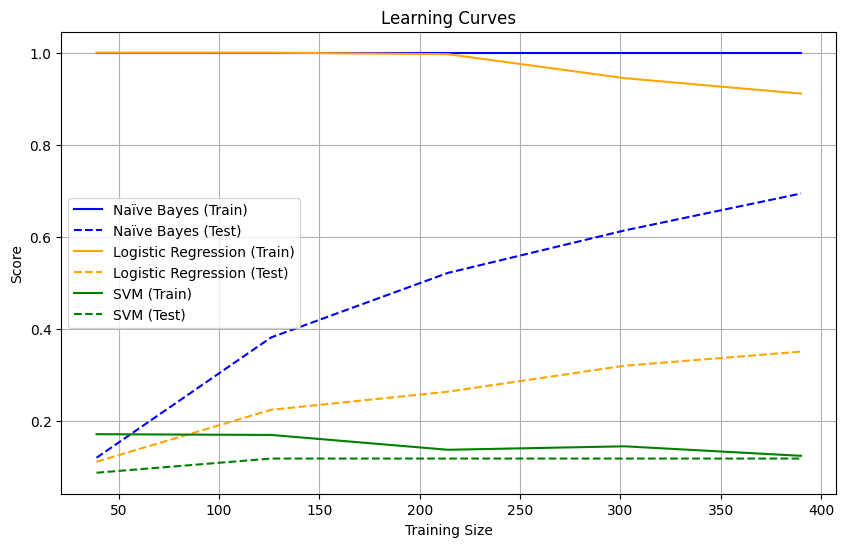

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')


# Strip whitespace from all string columns
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Encode categorical features and target
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = data.drop(columns=['Text'])  # Replace 'target_column' with your target column name
y = data['Sentiment']  # Replace 'target_column' with your target column name

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Learning curves for each model
train_sizes_nb, train_scores_nb, test_scores_nb = learning_curve(GaussianNB(), X_train, y_train, cv=3)
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(LogisticRegression(max_iter=1000), X_train, y_train, cv=3)
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(SVC(), X_train, y_train, cv=3)

# Plot learning curves
plt.figure(figsize=(10, 6))

plt.plot(train_sizes_nb, np.mean(train_scores_nb, axis=1), label='Naïve Bayes (Train)', color='blue')
plt.plot(train_sizes_nb, np.mean(test_scores_nb, axis=1), linestyle='--', color='blue', label='Naïve Bayes (Test)')

plt.plot(train_sizes_lr, np.mean(train_scores_lr, axis=1), label='Logistic Regression (Train)', color='orange')
plt.plot(train_sizes_lr, np.mean(test_scores_lr, axis=1), linestyle='--', color='orange', label='Logistic Regression (Test)')

plt.plot(train_sizes_svm, np.mean(train_scores_svm, axis=1), label='SVM (Train)', color='green')
plt.plot(train_sizes_svm, np.mean(test_scores_svm, axis=1), linestyle='--', color='green', label='SVM (Test)')

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


**8. Cross-Validation Results for SVM**

Columns in X: Index(['Unnamed: 0.1', 'Unnamed: 0', 'Retweets', 'Likes', 'Year', 'Month',
       'Day', 'Hour', 'Timestamp_2010-08-15 10:00:00',
       'Timestamp_2010-11-12 20:20:00',
       ...
       'Country_Peru', 'Country_Portugal', 'Country_Scotland',
       'Country_South Africa', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Country_Thailand', 'Country_UK', 'Country_USA'],
      dtype='object', length=2084)
Non-numeric columns: Index(['Timestamp_2010-08-15 10:00:00', 'Timestamp_2010-11-12 20:20:00',
       'Timestamp_2011-06-20 14:45:00', 'Timestamp_2011-07-22 18:30:00',
       'Timestamp_2011-08-28 18:45:00', 'Timestamp_2011-09-22 19:30:00',
       'Timestamp_2012-02-18 14:30:00', 'Timestamp_2012-03-10 08:30:00',
       'Timestamp_2012-03-30 11:20:00', 'Timestamp_2012-11-25 10:00:00',
       ...
       'Country_Peru', 'Country_Portugal', 'Country_Scotland',
       'Country_South Africa', 'Country_Spain', 'Country_Sweden',
       'Country_Switzerland', 'Coun

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


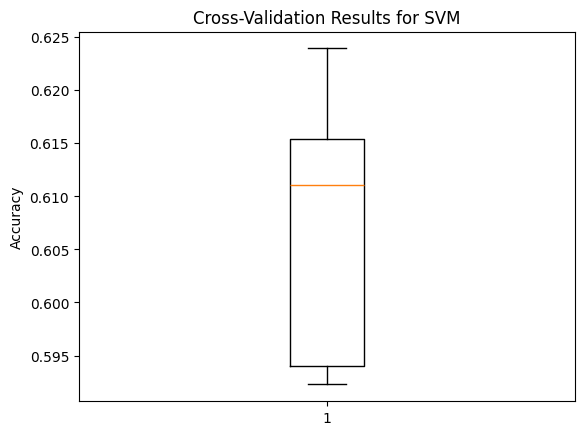

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import resample

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/sentimentdataset.csv')

# Clean string data (remove extra spaces)
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Handle datetime columns (convert and extract features)
if 'date_column' in data.columns:  # Replace 'date_column' with the actual column name
    data['date_column'] = pd.to_datetime(data['date_column'], errors='coerce')
    data['year'] = data['date_column'].dt.year
    data['month'] = data['date_column'].dt.month
    data['day'] = data['date_column'].dt.day
    data = data.drop(columns=['date_column'])  # Drop the original datetime column

# Encode the target variable
le = LabelEncoder()
data['Sentiment'] = le.fit_transform(data['Sentiment'])

# Drop or encode text data
X = data.drop(columns=['Text', 'Sentiment'], errors='ignore')  # Remove 'Text' column if present
y = data['Sentiment']

# Ensure all features are numeric
X = pd.get_dummies(X, drop_first=True)

# Check for non-numeric columns
print("Columns in X:", X.columns)
print("Non-numeric columns:", X.select_dtypes(exclude=['float', 'int']).columns)

# Address class imbalance
if y.value_counts().min() < 2:
    print("Class imbalance detected. Addressing it...")
    minority_class = y.value_counts().idxmin()
    minority_data = data[data['Sentiment'] == minority_class]
    majority_data = data[data['Sentiment'] != minority_class]

    # Oversample the minority class
    minority_upsampled = resample(minority_data,
                                  replace=True,
                                  n_samples=majority_data.shape[0],
                                  random_state=42)

    # Combine the datasets
    data = pd.concat([majority_data, minority_upsampled])
    X = data.drop(columns=['Text', 'Sentiment'], errors='ignore')
    y = data['Sentiment']

# Standardize features
scaler = StandardScaler()

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
X = scaler.fit_transform(X.fillna(0))  # Replace NaN values with 0

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate using cross-validation
from sklearn.svm import SVC
import matplotlib.pyplot as plt

svm_model = SVC(kernel='rbf', C=1)
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Plot cross-validation results
plt.boxplot(cv_scores)
plt.title('Cross-Validation Results for SVM')
plt.ylabel('Accuracy')
plt.show()


**Decomposition Plots**

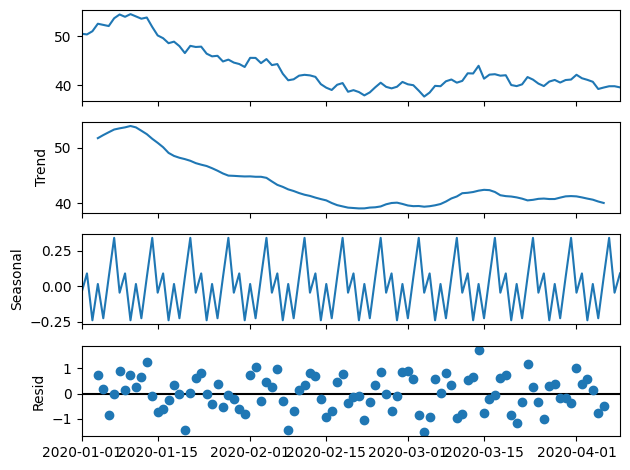

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Example Time-Series Data
import pandas as pd
import numpy as np

# Simulated dataset
np.random.seed(42)
date_range = pd.date_range(start="2020-01-01", periods=100, freq="D")
data = pd.Series(np.random.randn(100).cumsum() + 50, index=date_range)

# Decompose time series
decomposition = seasonal_decompose(data, period=7)
decomposition.plot()
plt.show()


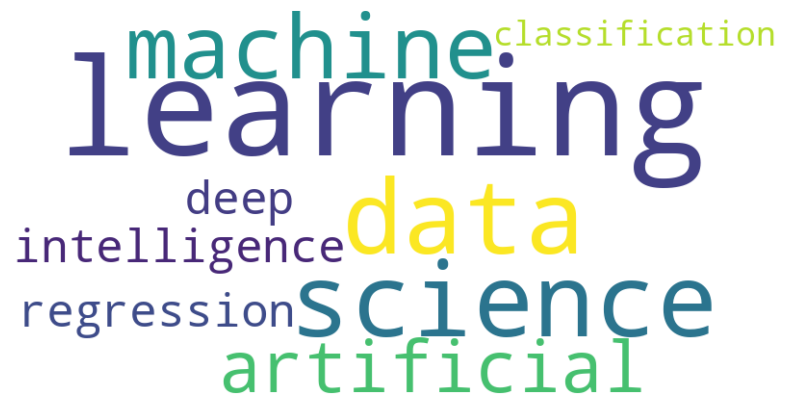

In [4]:
from wordcloud import WordCloud

# Example Text Data
text = "data science machine learning artificial intelligence deep learning regression classification"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


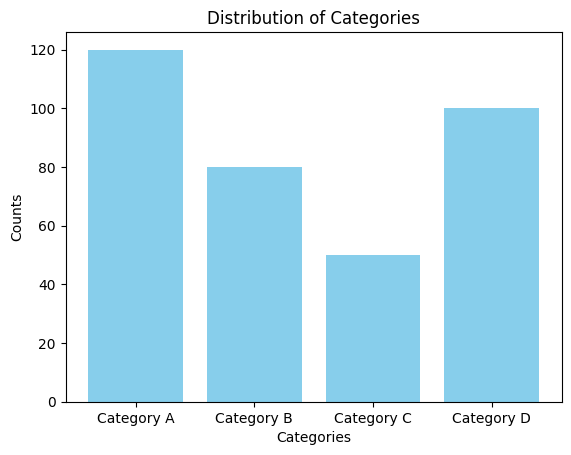

In [5]:
# Example Categorical Data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [120, 80, 50, 100]

plt.bar(categories, values, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Distribution of Categories')
plt.show()
